# Training with new ntuple

# prepare

## 1 - Load modules

In [1]:
import sys
sys.path.append("..") # add self-defined module in the parent path
sys.path.append("../..") # add self-defined module in the parent path
import time

from array import array
import datetime
import keras.backend
from keras.models import Sequential, Model, load_model
from keras.layers import Concatenate, Dense, Input
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adagrad, SGD, RMSprop, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from lfv_pdnn_code_v1.train.train_utils import *
from lfv_pdnn_code_v1.common.common_utils import *

Using TensorFlow backend.


Welcome to JupyROOT 6.18/00


## 2 - Load new array
### a) load background samples

In [2]:
# Set parent path to access data
data_path = "/mnt/e/data/new_ntuple/mc16a"

# Load
print "Loading new background array."
# di_boson
directory = data_path + "/di_boson"
search_pattern = "*.npy"
absolute_file_list, file_name_list = get_file_list(directory, search_pattern)
xb_di_boson = np.array([])
for path in absolute_file_list:
    temp_array = np.load(path)
    if len(temp_array) == 0:
        continue
    if len(xb_di_boson) == 0:
        xb_di_boson = temp_array.copy()
    else:
        xb_di_boson = np.concatenate((xb_di_boson, temp_array))
print "xb_di_boson shape:", xb_di_boson.shape
# top_quark
directory = data_path + "/top_quark"
search_pattern = "*.npy"
absolute_file_list, file_name_list = get_file_list(directory, search_pattern)
xb_top_quark = np.array([])
for path in absolute_file_list:
    temp_array = np.load(path)
    if len(temp_array) == 0:
        continue
    if len(xb_top_quark) == 0:
        xb_top_quark = temp_array.copy()
    else:
        xb_top_quark = np.concatenate((xb_top_quark, temp_array))
print "xb_top_quark shape:", xb_top_quark.shape
# w_jets
directory = data_path + "/w_jets"
search_pattern = "*.npy"
absolute_file_list, file_name_list = get_file_list(directory, search_pattern)
xb_w_jets = np.array([])
for path in absolute_file_list:
    temp_array = np.load(path)
    if len(temp_array) == 0:
        continue
    if len(xb_w_jets) == 0:
        xb_w_jets = temp_array.copy()
    else:
        xb_w_jets = np.concatenate((xb_w_jets, temp_array))
print "xb_w_jets shape:", xb_w_jets.shape
# z_ll
directory = data_path + "/z_ll"
search_pattern = "*.npy"
absolute_file_list, file_name_list = get_file_list(directory, search_pattern)
xb_z_ll = np.array([])
for path in absolute_file_list:
    temp_array = np.load(path)
    if len(temp_array) == 0:
        continue
    if len(xb_z_ll) == 0:
        xb_z_ll = temp_array.copy()
    else:
        xb_z_ll = np.concatenate((xb_z_ll, temp_array))
print "xb_z_ll shape:", xb_z_ll.shape

# Add all background together
print "\nAdding all background together."
xb = np.concatenate((xb_di_boson, xb_top_quark, xb_w_jets, xb_z_ll))
print "xb shape:", xb.shape

# Organize with dict
print "\nOrganizing new background with dict: xb_dict_new."
xb_dict_new = {}
xb_dict_new['di_boson'] = xb_di_boson
xb_dict_new['top_quark'] = xb_top_quark
xb_dict_new['w_jets'] = xb_w_jets
xb_dict_new['z_ll'] = xb_z_ll
xb_dict_new['all'] = xb

print "\nDone."

Loading new background array.
xb_di_boson shape: (427882, 24)
xb_top_quark shape: (1122168, 24)
xb_w_jets shape: (2015589, 24)
xb_z_ll shape: (128656, 24)

Adding all background together.
xb shape: (3694295, 24)

Organizing new background with dict: xb_dict_new.

Done.


### b) load signal samples

In [3]:
# Initialize
mass_min = 5000
mass_max = 0
xs_studied = np.array([])
mass_scan_map = [500, 2000]
#mass_scan_map = [500]
xs_dict_new = {}

# Load
print "Loading new signal array."
print "\nOrganizing new signal with dict: xs_dict_new."
data_path = "/mnt/e/data/new_ntuple/mc16a"
xs = np.array([])
for i, mass in enumerate(mass_scan_map):
    # load signal
    xs_add = np.load(data_path + "/signal/rpv_emu_{}GeV.npy".format(mass))
    xs_temp = np.load(data_path + "/signal/rpv_etau_{}GeV.npy".format(mass))
    xs_add = np.concatenate((xs_add, xs_temp))
    xs_temp = np.load(data_path + "/signal/rpv_mutau_{}GeV.npy".format(mass))
    xs_add = np.concatenate((xs_add, xs_temp))
    # add to dict xs_dict_new
    print "adding {}GeV signal to xs_dict_new".format(mass)
    xs_dict_new['{}GeV'.format(mass)] = xs_add
    # add to full signals
    if len(xs) == 0:
        xs = xs_add.copy()
    else:
        xs = np.concatenate((xs, xs_add))
xs_dict_new['all'] = xs

print "\nDone."

Loading new signal array.

Organizing new signal with dict: xs_dict_new.
adding 500GeV signal to xs_dict_new
adding 2000GeV signal to xs_dict_new

Done.


## 2 - Load old array
### a) load old background samples

In [4]:
# Load
print "Loading new background array."
xb_di_boson_old = np.load('/mnt/e/data/lfv/ntuples_last_run/TestData/data_npy/tree_bkg1.npy')
xb_drell_yan_old = np.load('/mnt/e/data/lfv/ntuples_last_run/TestData/data_npy/tree_bkg2.npy')
xb_top_quark_old = np.load('/mnt/e/data/lfv/ntuples_last_run/TestData/data_npy/tree_bkg3.npy')
xb_w_jets_old = np.load('/mnt/e/data/lfv/ntuples_last_run/TestData/data_npy/tree_bkg4.npy')
xb_z_ll_old = np.load('/mnt/e/data/lfv/ntuples_last_run/TestData/data_npy/tree_bkg5.npy')
xb_old = np.concatenate((xb_di_boson_old, xb_drell_yan_old, xb_top_quark_old, xb_w_jets_old, xb_z_ll_old))

# Organize with dict
print "\nOrganizing new background with dict: xb_dict_old."
xb_dict_old = {}
xb_dict_old['di_boson'] = xb_di_boson_old
xb_dict_old['drell_yan'] = xb_drell_yan_old
xb_dict_old['top_quark'] = xb_top_quark_old
xb_dict_old['w_jets'] = xb_w_jets_old
xb_dict_old['z_ll'] = xb_z_ll_old
xb_dict_old['all'] = xb_old

print "\nDone."

Loading new background array.

Organizing new background with dict: xb_dict_old.

Done.


### b) load old signal samples

In [5]:
# Initialize
mass_min = 5000
mass_max = 0
xs_old = np.array([])
xs_dict_old = {}
mass_scan_map = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,24,26,28,30,35,40,45,50]

# Load
print "Loading old signal array."
print "\nOrganizing old signal with dict: xs_dict_old."
for i, mass in enumerate(mass_scan_map):
    # load signal
    xs_add = np.load('/mnt/e/data/lfv/ntuples_last_run/train_array_0909/data_npy/emu/rpv_{}00GeV.npy'.format(mass))
    xs_temp = np.load('/mnt/e/data/lfv/ntuples_last_run/train_array_0909/data_npy/etau/rpv_{}00GeV.npy'.format(mass))
    xs_add = np.concatenate((xs_add, xs_temp))
    xs_temp = np.load('/mnt/e/data/lfv/ntuples_last_run/train_array_0909/data_npy/mutau/rpv_{}00GeV.npy'.format(mass))
    xs_add = np.concatenate((xs_add, xs_temp))
    # add to dict xs_dict_new
    #print "adding {}00GeV signal to xs_dict_old".format(mass)
    xs_dict_old['{}00GeV'.format(mass)] = xs_add
    # add to full signals
    if len(xs_old) == 0:
        xs_old = xs_add.copy()
    else:
        xs_old = np.concatenate((xs_old, xs_add))
xs_dict_old['all'] = xs

print "\nDone."

Loading old signal array.

Organizing old signal with dict: xs_dict_old.

Done.


# Make plots

## 1 - kinematic plots for emu channel

In [ ]:
MakePlots(xs_studied, xb, 0, bins = 50, range = (0, 3000)  , density = True,
          xlabel = "di-Lepton mass / GeV", ylabel = "events", show_plot = True)

MakePlots(xs_emu, xb_emu, 1, bins = 50, range = (0, 1000)  , density = True,
          xlabel="Ele_pt / GeV"          , ylabel="Events"  , show_plot = True)
MakePlots(xs_emu, xb_emu, 2, bins = 50, range = (-3, 3)    , density = True,
          xlabel="Ele_eta"               , ylabel="Events"  , show_plot = True)
MakePlots(xs_emu, xb_emu, 3, bins = 50, range = (-3.2, 3.2), density = True,
          xlabel="Ele_phi"               , ylabel="Events"  , show_plot = True)
MakePlots(xs_emu, xb_emu, 5, bins = 50, range = (0, 5000)  , density = True,
          xlabel="Mu_pt / GeV"           , ylabel="Events"  , show_plot = True)
MakePlots(xs_emu, xb_emu, 6, bins = 50, range = (-3, 3)    , density = True,
          xlabel="Mu_eta"                , ylabel="Events"  , show_plot = True)
MakePlots(xs_emu, xb_emu, 7, bins = 50, range = (-3.2, 3.2), density = True,
          xlabel="Mu_phi"                , ylabel="Events"  , show_plot = True)

MakePlots(xs_emu, xb_emu, 15, bins = 50, range = (0, 1000)  , density = True,
          xlabel="di-Lepton_pt"          , ylabel="Events"  , show_plot = True)
MakePlots(xs_emu, xb_emu, 16, bins = 50, range = (-3, 3)    , density = True,
          xlabel="di-Lepton_eta"         , ylabel="Events"  , show_plot = True)
MakePlots(xs_emu, xb_emu, 17, bins = 50, range = (-3.2, 3.2), density = True,
          xlabel="di-Lepton_phi"         , ylabel="Events"  , show_plot = True)
MakePlots(xs_emu, xb_emu, 18, bins = 50, range = (-3.2, 3.2), density = True,
          xlabel="di-Lepton_Dphi"        , ylabel="Events"  , show_plot = True)
MakePlots(xs_emu, xb_emu, 18, bins = 50, range = (0, 5)     , density = True,
          xlabel="di-Lepton_DR"          , ylabel="Events"  , show_plot = True)

# Training Test

## 1 - Train with individual mass point (new vs old)

### a) mass = 500 GeV

* old ntuple

Training emu.
Loading signal.
mass range: 472.9450298287913 to 527.0549701712088
Loading background.
sig events quantity: 8284
bkg events quantity: 5912
train data shape: (11356, 12)
test data shape: (2840, 12)
Train on 8517 samples, validate on 2839 samples
Epoch 1/30
8517/8517 [==============================] - 2s 278us/step - loss: 0.0829 - acc: 0.7021 - val_loss: 0.1572 - val_acc: 0.4484
Epoch 2/30
8517/8517 [==============================] - 1s 109us/step - loss: 0.0731 - acc: 0.7413 - val_loss: 0.1059 - val_acc: 0.7460
Epoch 3/30
8517/8517 [==============================] - 1s 108us/step - loss: 0.0713 - acc: 0.7463 - val_loss: 0.0825 - val_acc: 0.7242
Epoch 4/30
8517/8517 [==============================] - 1s 112us/step - loss: 0.0677 - acc: 0.7552 - val_loss: 0.0827 - val_acc: 0.7274
Epoch 5/30
8517/8517 [==============================] - 1s 115us/step - loss: 0.0688 - acc: 0.7509 - val_loss: 0.1243 - val_acc: 0.5970
Epoch 6/30
8517/8517 [==============================] - 1s 11

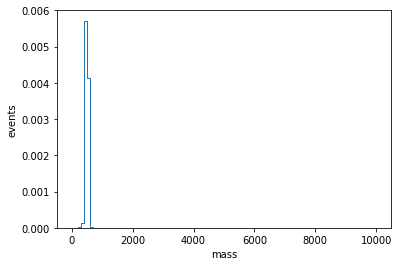

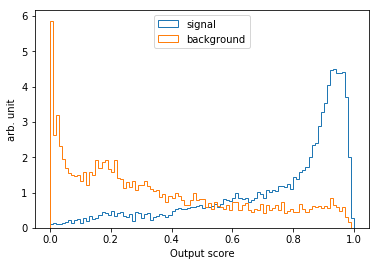

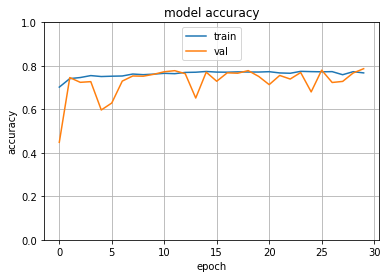

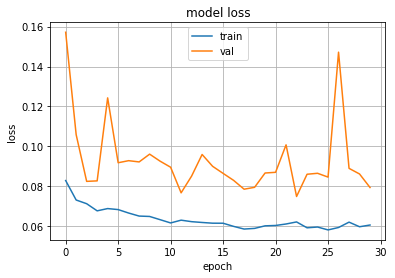

roc for sig and bkg


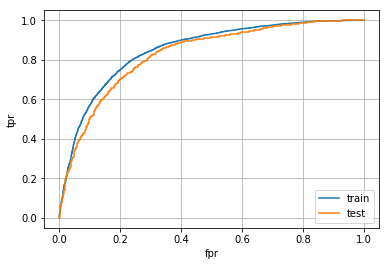

auc for train: 0.8504059451899088
auc for test:  0.8280779153069204

Done.


In [7]:
selected_features = [0, 1, 2, 3, 5, 6, 7, 15, 16, 17, 18, 19]

# emu
print "Training emu."
# get emu
print "Loading signal."
xs_emu = modify_array(xs_dict_old['500GeV'], weight_id = -1, select_channel = True, channel_id = -4,
                      norm = True, shuffle = True, shuffle_seed = int(time.time()))
mass_sigma = get_mass_range(xs_emu[:, 0], xs_emu[:, -1])
mass_min = 500 - mass_sigma
mass_max = 500 + mass_sigma
print "mass range:", mass_min, "to", mass_max
print "Loading background."
xb_emu = modify_array(xb_dict_old['all'], weight_id = -1, remove_negative_weight = True, select_channel = True, channel_id = -4,
                      select_mass = True, mass_id = 0, mass_min = mass_min, mass_max = mass_max,
                      reset_mass = True, reset_mass_array = xs_emu, reset_mass_id = 0,
                      norm = True, shuffle = True)
# set model
node_num = 300
model_deep = Sequential()
model_deep.add(Dense(node_num, kernel_initializer='uniform', input_dim = len(selected_features)))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
# set loss, optimizer and evaluation metrics
model_deep.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.025, decay=1e-6), metrics=["accuracy"])

# get part of signal events
print "sig events quantity:", len(xs_emu)
print "bkg events quantity:", len(xb_emu)

# get training data
x_emu_train, x_emu_test, y_emu_train, y_emu_test, xs_emu_test, xb_emu_test = \
split_and_combine(xs_emu, xb_emu, shuffle_before_return = True)
# get test data
#x1, x_emu_test, y1, y_emu_test, xs_emu_test, xb_emu_test = \
#split_and_combine(xs_emu_part, xb_emu, shuffle_before_return = True)

# select features wanted
x_emu_train_selected = get_part_feature(x_emu_train, selected_features)
x_emu_test_selected = get_part_feature(x_emu_test, selected_features)
print "train data shape:", x_emu_train_selected.shape
print "test data shape:", x_emu_test_selected.shape 

# train the model
train_history = model_deep.fit(x_emu_train_selected, y_emu_train, batch_size = 100, epochs = 30,
                validation_split = 0.25 , sample_weight = x_emu_train[:, -1], verbose = 1)
score = model_deep.evaluate(x_emu_test_selected, y_emu_test, verbose=0, sample_weight = x_emu_test[:, -1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# load test (cross validation) data
xs_emu_test_selected = get_part_feature(xs_emu, selected_features) # use full sample for validation
xb_emu_test_selected = get_part_feature(xb_emu, selected_features) #

# display scores
plt.hist(xs_emu[:, 0], bins = 100, weights = xs_emu[:, -1], range = (0, 10000), histtype='step', label='signal', density=True)
plt.xlabel("mass")
plt.ylabel("events")
plt.show()
PlotScores(xs_emu_test_selected, xb_emu_test_selected, model_deep, bins = 100, range = (0, 1), density = True)

# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim((0, 1))
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper center')
plt.grid()
plt.show()

# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper center')
plt.grid()
plt.show()

# make roc plots for signal
print "roc for sig and bkg"
plt.ylabel('tpr')
plt.xlabel('fpr')
predictions_dm = model_deep.predict(get_part_feature(x_emu_train, selected_features))
fpr_dm, tpr_dm, threshold = roc_curve(y_emu_train, predictions_dm)
plt.plot(fpr_dm, tpr_dm)
predictions_dm = model_deep.predict(get_part_feature(x_emu_test, selected_features))
fpr_dm_test, tpr_dm_test, threshold_test = roc_curve(y_emu_test, predictions_dm)
plt.plot(fpr_dm_test, tpr_dm_test)
plt.legend(['train', 'test'], loc='lower right')
plt.grid()
plt.show()
print "auc for train:", auc(fpr_dm, tpr_dm)
print "auc for test: ", auc(fpr_dm_test, tpr_dm_test)

print "\nDone."

* new ntuple

Training emu.
Loading signal.
mass range: 474.0537838949137 to 525.9462161050864
Loading background.
sig events quantity: 5660
bkg events quantity: 8422
train data shape: (11265, 12)
test data shape: (2817, 12)
Train on 8448 samples, validate on 2817 samples
Epoch 1/30
8448/8448 [==============================] - 3s 297us/step - loss: 0.0739 - acc: 0.7601 - val_loss: 0.1052 - val_acc: 0.6755
Epoch 2/30
8448/8448 [==============================] - 1s 109us/step - loss: 0.0676 - acc: 0.7772 - val_loss: 0.0789 - val_acc: 0.7519
Epoch 3/30
8448/8448 [==============================] - 1s 119us/step - loss: 0.0661 - acc: 0.7823 - val_loss: 0.0713 - val_acc: 0.7430
Epoch 4/30
8448/8448 [==============================] - 1s 120us/step - loss: 0.0652 - acc: 0.7827 - val_loss: 0.0817 - val_acc: 0.6770
Epoch 5/30
8448/8448 [==============================] - 1s 109us/step - loss: 0.0643 - acc: 0.7865 - val_loss: 0.0757 - val_acc: 0.7249
Epoch 6/30
8448/8448 [==============================] - 1s 11

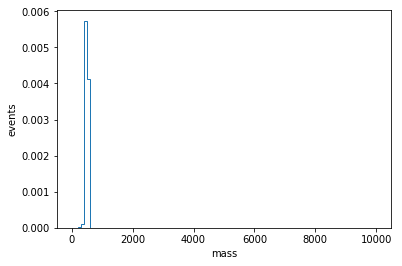

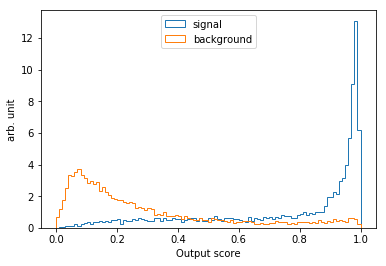

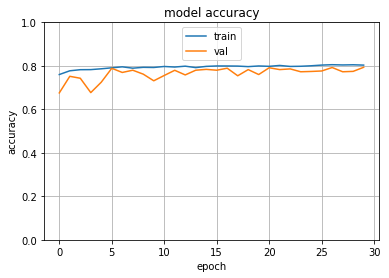

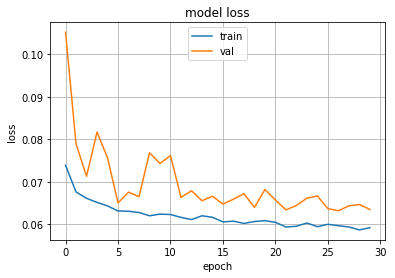

roc for sig and bkg


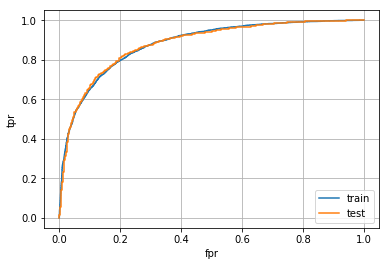

auc for train: 0.8805408046697448
auc for test:  0.8797218231957304

Done.


In [8]:
selected_features = [0, 1, 2, 3, 5, 6, 7, 15, 16, 17, 18, 19]

# emu
print "Training emu."
# get emu
print "Loading signal."
xs_emu = modify_array(xs_dict_new['500GeV'], weight_id = -1, select_channel = True, channel_id = -4,
                      norm = True, shuffle = True, shuffle_seed = int(time.time()))
mass_sigma = get_mass_range(xs_emu[:, 0], xs_emu[:, -1])
mass_min = 500 - mass_sigma
mass_max = 500 + mass_sigma
print "mass range:", mass_min, "to", mass_max
print "Loading background."
xb_emu = modify_array(xb_dict_new['all'], weight_id = -1, remove_negative_weight = True, select_channel = True, channel_id = -4,
                      select_mass = True, mass_id = 0, mass_min = mass_min, mass_max = mass_max,
                      reset_mass = True, reset_mass_array = xs_emu, reset_mass_id = 0,
                      norm = True, shuffle = True)
# set model
node_num = 300
model_deep = Sequential()
model_deep.add(Dense(node_num, kernel_initializer='uniform', input_dim = len(selected_features)))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
model_deep.add(BatchNormalization())
model_deep.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
# set loss, optimizer and evaluation metrics
model_deep.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.025, decay=1e-6), metrics=["accuracy"])

# get part of signal events
print "sig events quantity:", len(xs_emu)
print "bkg events quantity:", len(xb_emu)

# get training data
x_emu_train, x_emu_test, y_emu_train, y_emu_test, xs_emu_test, xb_emu_test = \
split_and_combine(xs_emu, xb_emu, shuffle_before_return = True)
# get test data
#x1, x_emu_test, y1, y_emu_test, xs_emu_test, xb_emu_test = \
#split_and_combine(xs_emu_part, xb_emu, shuffle_before_return = True)

# select features wanted
x_emu_train_selected = get_part_feature(x_emu_train, selected_features)
x_emu_test_selected = get_part_feature(x_emu_test, selected_features)
print "train data shape:", x_emu_train_selected.shape
print "test data shape:", x_emu_test_selected.shape 

# train the model
train_history = model_deep.fit(x_emu_train_selected, y_emu_train, batch_size = 100, epochs = 30,
                validation_split = 0.25 , sample_weight = x_emu_train[:, -1], verbose = 1)
score = model_deep.evaluate(x_emu_test_selected, y_emu_test, verbose=0, sample_weight = x_emu_test[:, -1])
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# load test (cross validation) data
xs_emu_test_selected = get_part_feature(xs_emu, selected_features) # use full sample for validation
xb_emu_test_selected = get_part_feature(xb_emu, selected_features) #

# display scores
plt.hist(xs_emu[:, 0], bins = 100, weights = xs_emu[:, -1], range = (0, 10000), histtype='step', label='signal', density=True)
plt.xlabel("mass")
plt.ylabel("events")
plt.show()
PlotScores(xs_emu_test_selected, xb_emu_test_selected, model_deep, bins = 100, range = (0, 1), density = True)

# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim((0, 1))
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper center')
plt.grid()
plt.show()

# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper center')
plt.grid()
plt.show()

# make roc plots for signal
print "roc for sig and bkg"
plt.ylabel('tpr')
plt.xlabel('fpr')
predictions_dm = model_deep.predict(get_part_feature(x_emu_train, selected_features))
fpr_dm, tpr_dm, threshold = roc_curve(y_emu_train, predictions_dm)
plt.plot(fpr_dm, tpr_dm)
predictions_dm = model_deep.predict(get_part_feature(x_emu_test, selected_features))
fpr_dm_test, tpr_dm_test, threshold_test = roc_curve(y_emu_test, predictions_dm)
plt.plot(fpr_dm_test, tpr_dm_test)
plt.legend(['train', 'test'], loc='lower right')
plt.grid()
plt.show()
print "auc for train:", auc(fpr_dm, tpr_dm)
print "auc for test: ", auc(fpr_dm_test, tpr_dm_test)

print "\nDone."

## x - use 100% -> 1% signal for training
number of background events fixed

In [ ]:
#percentage_list = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
percentage_list = [1]
#percentage_list = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1]
#percentage_list = [0.01, 0.1, 0.2, 0.5, 1]

selected_features = [0, 1, 2, 3, 5, 6, 7, 15, 16, 17, 18, 19]

# training with different percentage of signals
for percent in percentage_list:
    # set up training model
    node_num = 300
    model_deep = Sequential()
    model_deep.add(Dense(node_num, kernel_initializer='uniform', input_dim = len(selected_features)))
    model_deep.add(BatchNormalization())
    model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
    model_deep.add(BatchNormalization())
    model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
    model_deep.add(BatchNormalization())
    #"""
    model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
    model_deep.add(BatchNormalization())
    model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
    model_deep.add(BatchNormalization())
    model_deep.add(Dense(node_num, kernel_initializer="glorot_normal", activation="relu"))
    model_deep.add(BatchNormalization())
    #"""
    model_deep.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
    # set loss, optimizer and evaluation metrics
    model_deep.compile(loss="binary_crossentropy", optimizer=SGD(lr=0.01, decay=1e-6), metrics=["accuracy"])

    # get part of signal events
    print "*" * 80
    print "use {}% signal for training".format(percent * 100)
    print "sig events quantity:", len(xs_emu) * percent
    print "bkg events quantity:", len(xb_emu)
    index_len = int(len(xs_emu) * percent)
    index = np.random.choice(xs_emu.shape[0], index_len, replace = False)
    xs_emu_part = xs_emu[index]
    #print "debug:", xs_emu_part[0:5]
    print "debug:", index[0:10]
    print "debug: ", xs_emu.shape[0], xs_emu_part.shape[0], index_len
    """
    xs_emu_part, x2, y1, y2 = train_test_split(xs_emu, np.ones(len(xs_emu)), 
                                               test_size= 1 - percent, 
                                               random_state=3456, shuffle=True)
    """
    xs_emu_part = modify_array(xs_emu_part, weight_id = -1, 
                               norm = True, shuffle = True)
    xb_emu_temp = modify_array(xb_emu, weight_id = -1, mass_id = 0,
                               reset_mass = True, reset_mass_array = xs_emu_part, reset_mass_id = 0,
                               norm = True, shuffle = True)
    
    # get training data
    x_emu_train, x_emu_test, y_emu_train, y_emu_test, xs_emu_test, xb_emu_test = \
    split_and_combine(xs_emu_part, xb_emu_temp, shuffle_before_return = True)
    # get test data
    #x1, x_emu_test, y1, y_emu_test, xs_emu_test, xb_emu_test = \
    #split_and_combine(xs_emu_part, xb_emu, shuffle_before_return = True)

    # select features wanted
    x_emu_train_selected = get_part_feature(x_emu_train, selected_features)
    x_emu_test_selected = get_part_feature(x_emu_test, selected_features)
    print "train data shape:", x_emu_train_selected.shape
    print "test data shape:", x_emu_test_selected.shape 

    # train the model
    train_history = model_deep.fit(x_emu_train_selected, y_emu_train, batch_size = 100, epochs = 30,
                    validation_split = 0.25 , sample_weight = x_emu_train[:, -1], verbose = 1)
    score = model_deep.evaluate(x_emu_test_selected, y_emu_test, verbose=0, sample_weight = x_emu_test[:, -1])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    # load test (cross validation) data
    xs_emu_test_selected = get_part_feature(xs_emu, selected_features) # use full sample for validation
    xb_emu_test_selected = get_part_feature(xb_emu, selected_features) #
    
    # display scores
    plt.hist(xs_emu[:, 0], bins = 100, weights = xs_emu[:, -1], range = (0, 10000), histtype='step', label='signal', density=True)
    plt.xlabel("mass")
    plt.ylabel("events")
    plt.show()
    PlotScores(xs_emu_test_selected, xb_emu_test_selected, model_deep, bins = 100, range = (0, 1), density = True)
    
    # summarize history for accuracy
    plt.plot(train_history.history['acc'])
    plt.plot(train_history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.ylim((0, 1))
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper center')
    plt.grid()
    plt.show()
    
    # summarize history for loss
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper center')
    plt.grid()
    plt.show()
    
    # make roc plots for signal
    print "roc for sig and bkg"
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    predictions_dm = model_deep.predict(get_part_feature(x_emu_train, selected_features))
    fpr_dm, tpr_dm, threshold = roc_curve(y_emu_train, predictions_dm)
    plt.plot(fpr_dm, tpr_dm)
    predictions_dm = model_deep.predict(get_part_feature(x_emu_test, selected_features))
    fpr_dm_test, tpr_dm_test, threshold_test = roc_curve(y_emu_test, predictions_dm)
    plt.plot(fpr_dm_test, tpr_dm_test)
    plt.legend(['train', 'test'], loc='lower right')
    plt.grid()
    plt.show()
    print "auc for train:", auc(fpr_dm, tpr_dm)
    print "auc for test: ", auc(fpr_dm_test, tpr_dm_test)
    
    # clear model for next training
    K.clear_session()

# test area

In [5]:
test_dict = {}
a = 1
b = 2
test_dict['a'] = a
test_dict['b'] = b
print test_dict

a = 10
b = 20
print test_dict

test_dict['a'] = 100
print test_dict
print a

{'a': 1, 'b': 2}
{'a': 1, 'b': 2}
{'a': 100, 'b': 2}
10
